# Support Vector Regressor (SVR)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # for dataset
from sklearn.svm import SVR  # for Support Vector Regressor algorithm
from sklearn.metrics import r2_score # to Check Accuracy
from sklearn.model_selection import GridSearchCV # For hyper parameter tuning

In [90]:
X , y = make_regression(n_samples=1000,n_features=2,n_targets=1
                        ,noise=3.0 # this determines the Standard Deviation of data
                        )

In [91]:
X

array([[-0.73401831,  0.64653281],
       [ 0.16600813,  0.36882988],
       [-0.27076229, -0.43587928],
       ...,
       [-1.39147716, -0.55869153],
       [-1.69132845,  0.3067249 ],
       [-1.27882268, -1.73750694]])

In [92]:
y.shape

(1000,)

In [93]:
df = pd.DataFrame(data=X)

In [94]:
df

,0,1
0,-0.734018,0.646533
1,0.166008,0.368830
2,-0.270762,-0.435879
3,-1.634409,-0.137847
4,-0.054637,1.444138
...,...,...
995,-0.734129,-3.090480
996,-1.921220,0.408122
997,-1.391477,-0.558692
998,-1.691328,0.306725


<Axes: xlabel='0', ylabel='1'>

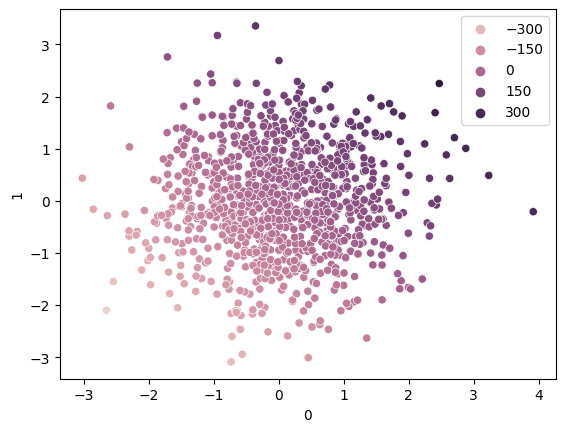

In [95]:
# visualizing data Points
sns.scatterplot(x=df[0],y=df[1],hue=y)

wow this is perfectly normally distributed 😍😍


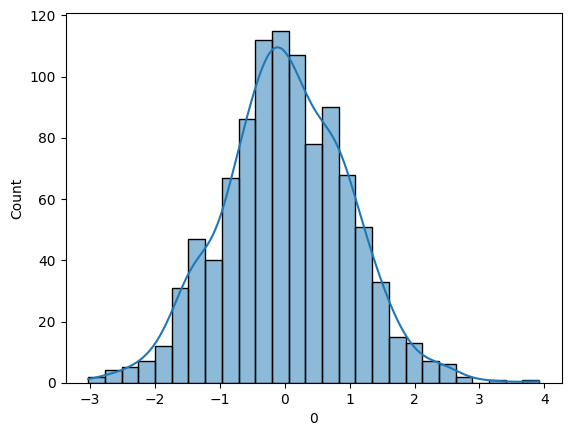

In [96]:
sns.histplot(x=df[0],kde=True)
print('wow this is perfectly normally distributed 😍😍')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [98]:
svr = SVR(kernel='linear')
svr

SVR(kernel='linear')

In [99]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [100]:
svr.coef_

array([[80.3664284 , 79.19441683]])

In [101]:
y_pred = svr.predict(X_test)

In [102]:
# checking accuracy of the model
r2_score_acc = r2_score(y_true=y_test,y_pred=y_pred)
print(r2_score_acc)
accAdjusted_r2_score =  1-(1-r2_score_acc)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(accAdjusted_r2_score)

0.9993712324836119
0.9993673868107288


## Hyper parameter Tuning
#### GridSearchCV for hyper parameter tuning

In [103]:
parameters = {
    'C': [0.1,1,10,100,1000],
    'gamma': ['auto','scale'],
    'epsilon' : [0.1,0.2,0.3],
    'kernel':['linear']
}

In [104]:
grid = GridSearchCV(estimator=SVR(),
                    param_grid=parameters,
                    refit=True,
                    cv=5,
                    verbose=3
                    )


In [105]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=auto, kernel=linear;, score=0.596 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=auto, kernel=linear;, score=0.592 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=auto, kernel=linear;, score=0.591 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=auto, kernel=linear;, score=0.603 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=auto, kernel=linear;, score=0.588 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=scale, kernel=linear;, score=0.596 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=scale, kernel=linear;, score=0.592 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=scale, kernel=linear;, score=0.591 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=scale, kernel=linear;, score=0.603 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=scale, kernel=linear;, score=0.588 total time=   0.0s
[CV 1/5] END 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear']},
             verbose=3)

In [107]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 'auto', 'kernel': 'linear'}

In [120]:
# Prediction
y_pred1 = grid.predict(X_test)
r2_score(y_test,y_pred1)

0.999364197652898